# **Data Centralizada**

En el presente cuadernillo se centralizará las diversas bases de datos usadas para el proyecto de análisis del nivel de prevención de sismos en los distritos del Perú. Las fuentes de base de datos son los siguientes:
* Base de Datos de ENAHO
* Base de Datos de establecimientos de salud
* Base de Datos de sismos
* Base de Datos de tipos de suelo
* Base de Datos de Proyectos ante ocurrencias de Desastres Naturales

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importar librerias
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Datos de Ubigeo

In [ ]:
filename = "/content/drive/MyDrive/Hackathon Girls 💅/Databases/TB_UBIGEOS.csv"
df_ubigeo = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
df_ubigeo = df_ubigeo[["ubigeo_inei","region","provincia","distrito","latitud","longitud"]].copy()
df_ubigeo.head()

,ubigeo_inei,region,provincia,distrito,latitud,longitud
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,-6.2294,-77.8728
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,-6.0325,-77.7108
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,-6.8358,-78.0197
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,-6.2556,-77.7008
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,-6.0783,-77.7375


## **Carga de Datos**

In [ ]:
# Carga de ENAHO
filename = "/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/df_ENAHO04-11.csv"
df_ENAHO0411 = pd.read_csv(filename)
filename = "/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/df_ENAHO12-22.csv"
df_ENAHO1222 = pd.read_csv(filename)
df_ENAHO0411.head()

,YEAR,UBIGEO,DOMINIO,ESTRATO,Tipo_Vivienda_1,Tipo_Vivienda_2,Tipo_Vivienda_3,Tipo_Vivienda_4,Tipo_Vivienda_5,Tipo_Vivienda_6,...,Nivel_propiedad_vivienda_7,Titulo_propiedad_1,Titulo_propiedad_2,Titulo_propiedad_3,Conteo_viviendas,ubigeo_inei,region,provincia,distrito,Key
0,2007,10202,7,6,27,0,0,0,0,0,...,0,3,19,0,37,10202,AMAZONAS,BAGUA,ARAMANGO,AMAZONASBAGUAARAMANGO2007
1,2007,10201,7,5,97,0,1,7,0,0,...,1,24,37,2,122,10201,AMAZONAS,BAGUA,BAGUA,AMAZONASBAGUABAGUA2007
2,2007,10203,7,6,16,0,0,0,0,0,...,0,4,8,0,16,10203,AMAZONAS,BAGUA,COPALLIN,AMAZONASBAGUACOPALLIN2007
3,2007,10204,7,7,8,0,0,0,0,0,...,0,0,8,0,11,10204,AMAZONAS,BAGUA,EL PARCO,AMAZONASBAGUAEL PARCO2007
4,2007,10205,7,7,8,0,0,0,14,0,...,0,1,20,0,40,10205,AMAZONAS,BAGUA,IMAZA,AMAZONASBAGUAIMAZA2007


In [ ]:
df_ENAHO0411 = df_ENAHO0411.fillna(0)
df_ENAHO1222 = df_ENAHO1222.fillna(0)

In [ ]:
# Carga de Sismos
filename = "/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/Sismos_completo.csv"
df_sismo = pd.read_csv(filename)
df_sismo = df_sismo.apply(lambda x: x.str.upper() if x.dtype == "object" else x)
df_sismo.head()

,key,Conteo,Promedio,Min_Mag,Max_Mag
0,AREQUIPACAYLLOMACAYLLOMA2021,50,3.804000,3.4,5.5
1,TACNATARATATARATA2021,48,3.795833,3.2,5.0
2,AREQUIPACAYLLOMAMACA2020,34,3.458824,3.2,3.9
3,PIURASULLANAMIGUEL CHECA2021,32,3.940625,3.5,4.8
4,AREQUIPACAYLLOMAPINCHOLLO2020,30,3.506667,3.3,3.9


In [ ]:
!pip install unidecode

In [ ]:
from unidecode import unidecode
def quitar_tildes(texto):
    return unidecode(texto)

In [ ]:
df_sismo['key'] = df_sismo['key'].apply(quitar_tildes)

In [ ]:
# Carga de Hospitales
filename = "/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/Hospitales.csv"
df_hospitales = pd.read_csv(filename)
df_hospitales.head()

,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,key
0,5.0,3.0,3.0,0.0,AMAZONASBAGUAARAMANGO2004
1,10.0,3.0,3.0,0.0,AMAZONASBAGUAARAMANGO2005
2,13.0,3.0,3.0,0.0,AMAZONASBAGUAARAMANGO2006
3,13.0,3.0,3.0,0.0,AMAZONASBAGUAARAMANGO2007
4,13.0,3.0,3.0,0.0,AMAZONASBAGUAARAMANGO2008


In [ ]:
df_hospitales['key'] = df_hospitales['key'].str.replace(' ', '')

In [ ]:
# Carga de Proyectos
filename = "/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/df_proyectoFondes.csv"
df_proyectos = pd.read_csv(filename)
df_proyectos.head()

,Contador,MONTO_DEVENGADO,Key
0,3,214244.04,ANCASHAIJAAIJA2017
1,1,100000.00,ANCASHAIJACORIS2017
2,1,98903.00,ANCASHAIJAHUACLLAN2017
3,2,50000.00,ANCASHAIJALA MERCED2017
4,1,99999.50,ANCASHAIJASUCCHA2017


In [ ]:
# Carga de Suelos
filename = "/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/Suelos_2004_2022.csv"
df_suelos = pd.read_csv(filename)
df_suelos = df_suelos[["DPD","DESCRIPCIO"]]
df_suelos = pd.get_dummies(df_suelos,columns=["DESCRIPCIO"])
df_suelos = df_suelos.drop_duplicates(subset=['DPD'],keep='first')
df_suelos.head()

,DPD,DESCRIPCIO_Cambisol dístrico - Nitisol háplico,DESCRIPCIO_Cambisol éutrico - Phaeozem háplico,DESCRIPCIO_Cambisol éutrico - Vertisol éutrico,DESCRIPCIO_Fluvisol éutrico - Gleysol éutrico,DESCRIPCIO_Fluvisol éutrico - Regosol éutrico,DESCRIPCIO_Gleysol dístrico - Lixisol háplico - Fluvisol dístrico,DESCRIPCIO_Leptosol dístrico - Andosol úmbrico - Afloramiento lítico,DESCRIPCIO_Leptosol dístrico - Regosol dístrico - Afloramiento lítico,DESCRIPCIO_Leptosol éutrico - Cambisol éutrico,DESCRIPCIO_Leptosol éutrico - Kastanozem háplico - Afloramiento lítico,DESCRIPCIO_Leptosol éutrico - Regosol éutrico - Afloramiento lítico,DESCRIPCIO_Lixisol háplico - Gleysol dístrico,DESCRIPCIO_Regosol dístrico - Afloramiento lítico,DESCRIPCIO_Regosol dístrico - Cambisol dístrico,DESCRIPCIO_Regosol éutrico - Andosol móllico,DESCRIPCIO_Regosol éutrico - Calcisol háplico,DESCRIPCIO_Regosol éutrico - Cambisol éutrico
0,APURIMACABANCAYABANCAY2004,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,APURIMACABANCAYCHACOCHE2004,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,APURIMACABANCAYCIRCA2004,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,APURIMACABANCAYCURAHUASI2004,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,APURIMACABANCAYHUANIPACA2004,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## **Concatenación de Databases**

### **Datos del 2004 al 2011**
Para este caso no se concatenarála Base de datos de proyectos debido a que este hace aparición recién a partir del 2017

In [ ]:
# Concatenar 2004 al 2011
# -> ENAHO Y SISMO
df_c1 = pd.merge(df_ENAHO0411, df_sismo, how="left", left_on=["Key"], right_on=["key"])
df_c1.drop(columns=["key"],inplace=True)
df_c1["Conteo"].fillna(0,inplace=True)
df_c1["Promedio"].fillna(0,inplace=True)
df_c1["Min_Mag"].fillna(0,inplace=True)
df_c1["Max_Mag"].fillna(0,inplace=True)

In [ ]:
# -> DF Y HOSPITALES
df_c2 = pd.merge(df_c1, df_hospitales, how="left", left_on=["Key"], right_on=["key"])
df_c2.drop(columns=["key"],inplace=True)
df_c2["Categoria_I-1"].fillna(0,inplace=True)
df_c2["Categoria_I-2"].fillna(0,inplace=True)
df_c2["Categoria_I-3"].fillna(0,inplace=True)
df_c2["Categoria_I-4"].fillna(0,inplace=True)

In [ ]:
# -> DF Y SUELOS
df_c3 = pd.merge(df_c2, df_suelos, how="left", left_on=["Key"], right_on=["DPD"])
df_c3.drop(columns=["DPD"],inplace=True)

### **Datos del 2012 al 2022**
Para este caso se concatenarán todas las Base de datos.

In [ ]:
# Concatenar 2012 al 2022
# -> ENAHO Y SISMO
df_c1 = pd.merge(df_ENAHO1222, df_sismo, how="left", left_on=["Key"], right_on=["key"])
df_c1.drop(columns=["key"],inplace=True)
df_c1["Conteo"].fillna(0,inplace=True)
df_c1["Promedio"].fillna(0,inplace=True)
df_c1["Min_Mag"].fillna(0,inplace=True)
df_c1["Max_Mag"].fillna(0,inplace=True)

In [ ]:
# -> DF Y HOSPITALES
df_c2 = pd.merge(df_c1, df_hospitales, how="left", left_on=["Key"], right_on=["key"])
df_c2.drop(columns=["key"],inplace=True)
df_c2["Categoria_I-1"].fillna(0,inplace=True)
df_c2["Categoria_I-2"].fillna(0,inplace=True)
df_c2["Categoria_I-3"].fillna(0,inplace=True)
df_c2["Categoria_I-4"].fillna(0,inplace=True)

In [ ]:
# -> DF Y PROYECTOS
df_c3 = pd.merge(df_c2, df_proyectos, how="left", on=["Key"])

In [ ]:
# Se rellena con 0 los que son Null en las variables añadidas del DF_PROYECTOS debido a que de esta Base de Datos solo se tiene registro a partir del 2017
df_c3 = df_c3.fillna(0)

In [ ]:
# -> DF y SUELOS
df_c4 = pd.merge(df_c3, df_suelos, how="left", left_on=["Key"], right_on=["DPD"])
df_c4.drop(columns=["DPD"],inplace=True)

## **CLUSTERING**
Se extrae un año de muestra para poder probar el clutering para el nivel de prevención ante sismos de los distritos tomados. Las consideraciones son:
* Debe ser un año mayor o igual al 2017, debido a que es aprtir de este año en el cual tenemos información para todas las bases de datos
* Debe ser el año cuando ocurrió más sismos, pues se puede observar de mejor manera la frecuencia de sismos en ciertas zonas recurrentes
* No se considera la Base de Datos de Tipo de suelo debido a que a pesar de tener el tipo de suelo, no se ha obtenido una referencia excta del nivel de vulnerabilidad al que expone aquellos tipos de suelos a las casas. Lo cual esesencial para ofrecer una interpretación más detallada.

In [ ]:
dfp = df_c3[df_c3["YEAR"]>=2017].copy()

In [ ]:
grupo = dfp.groupby("YEAR").sum()
grupo[["Conteo"]]

,Conteo
YEAR,
2017,345.0
2018,240.0
2019,241.0
2020,356.0
2021,382.0
2022,192.0


El año en el que hubo más sismos fue el 2021

In [ ]:
clust = df_c3[df_c3["YEAR"]==2021].copy()

In [ ]:
clust.shape

(1255, 69)

In [ ]:
# Columnas Object
columnas_object = clust.select_dtypes(include=['object'])
columnas_object.head()

,region,provincia,distrito,Key
1315,AMAZONAS,BAGUA,ARAMANGO,AMAZONASBAGUAARAMANGO2021
1316,AMAZONAS,BAGUA,BAGUA,AMAZONASBAGUABAGUA2021
1317,AMAZONAS,BAGUA,COPALLIN,AMAZONASBAGUACOPALLIN2021
1318,AMAZONAS,BAGUA,IMAZA,AMAZONASBAGUAIMAZA2021
1319,AMAZONAS,BAGUA,LA PECA,AMAZONASBAGUALA PECA2021


In [ ]:
columnas_object = clust.select_dtypes(include=['object'])

In [ ]:
columnas_object

,region,provincia,distrito,Key
1315,AMAZONAS,BAGUA,ARAMANGO,AMAZONASBAGUAARAMANGO2021
1316,AMAZONAS,BAGUA,BAGUA,AMAZONASBAGUABAGUA2021
1317,AMAZONAS,BAGUA,COPALLIN,AMAZONASBAGUACOPALLIN2021
1318,AMAZONAS,BAGUA,IMAZA,AMAZONASBAGUAIMAZA2021
1319,AMAZONAS,BAGUA,LA PECA,AMAZONASBAGUALA PECA2021
...,...,...,...,...
2565,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,UCAYALIPADRE ABADALEXANDER VON HUMBOLDT2021
2566,UCAYALI,PADRE ABAD,CURIMANA,UCAYALIPADRE ABADCURIMANA2021
2567,UCAYALI,PADRE ABAD,IRAZOLA,UCAYALIPADRE ABADIRAZOLA2021
2568,UCAYALI,PADRE ABAD,NESHUYA,UCAYALIPADRE ABADNESHUYA2021


In [ ]:
# Transformamos la variable "Key" en Indice
clust = clust.set_index('Key')
clust.head()

,YEAR,UBIGEO,DOMINIO,ESTRATO,Registro_SUNARP_1,Registro_SUNARP_2,Asistencia_Tecnica_1,Asistencia_Tecnica_2,Asistencia_Tecnica_3,Licencia_1,...,Conteo,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,Contador,MONTO_DEVENGADO
Key,,,,,,,,,,,,,,,,,,,,,
AMAZONASBAGUAARAMANGO2021,2021,10202,7,7,2,3,0,41,1,0,...,0.0,0.0,0.0,0.0,13.0,3.0,3.0,0.0,1.0,574686.37
AMAZONASBAGUABAGUA2021,2021,10201,7,5,15,3,6,50,7,10,...,0.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0,0.0,0.00
AMAZONASBAGUACOPALLIN2021,2021,10203,7,5,4,2,2,9,1,1,...,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.00
AMAZONASBAGUAIMAZA2021,2021,10205,7,7,2,7,0,76,0,0,...,1.0,3.9,3.9,3.9,29.0,5.0,5.0,0.0,0.0,0.00
AMAZONASBAGUALA PECA2021,2021,10206,7,6,7,0,0,22,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [ ]:
clust_backup = clust.copy()

In [ ]:
# Seleccionar solo las variables cuantitativas
clust = clust.select_dtypes(include=['int64', 'float64'])
clust = clust.drop(columns=['YEAR', 'UBIGEO'])
clust.head()

,DOMINIO,ESTRATO,Registro_SUNARP_1,Registro_SUNARP_2,Asistencia_Tecnica_1,Asistencia_Tecnica_2,Asistencia_Tecnica_3,Licencia_1,Licencia_2,Licencia_3,...,Conteo,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,Contador,MONTO_DEVENGADO
Key,,,,,,,,,,,,,,,,,,,,,
AMAZONASBAGUAARAMANGO2021,7,7,2,3,0,41,1,0,41,1,...,0.0,0.0,0.0,0.0,13.0,3.0,3.0,0.0,1.0,574686.37
AMAZONASBAGUABAGUA2021,7,5,15,3,6,50,7,10,42,11,...,0.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0,0.0,0.00
AMAZONASBAGUACOPALLIN2021,7,5,4,2,2,9,1,1,10,1,...,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.00
AMAZONASBAGUAIMAZA2021,7,7,2,7,0,76,0,0,75,1,...,1.0,3.9,3.9,3.9,29.0,5.0,5.0,0.0,0.0,0.00
AMAZONASBAGUALA PECA2021,7,6,7,0,0,22,3,1,21,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


### **KMeans**

In [ ]:
# Importa librerias para clustering
from sklearn.cluster import KMeans   # libreria de k-means

In [ ]:
# muestra una descripcion del dataset
clust.describe()

,DOMINIO,ESTRATO,Registro_SUNARP_1,Registro_SUNARP_2,Asistencia_Tecnica_1,Asistencia_Tecnica_2,Asistencia_Tecnica_3,Licencia_1,Licencia_2,Licencia_3,...,Conteo,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,Contador,MONTO_DEVENGADO
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,...,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,4.902789,5.801594,7.721116,1.658167,3.917131,19.246215,2.376096,4.842231,18.195219,2.501992,...,0.304382,0.377791,0.364622,0.397610,1.553785,0.685259,0.418327,0.110757,1.126693,4.172070e+05
std,1.915300,1.783228,19.496501,3.467364,12.576128,26.647545,7.191640,13.929040,25.275061,7.154579,...,2.319002,1.188732,1.148062,1.256636,3.368647,1.503499,0.913909,0.331259,2.442457,1.074422e+06
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,4.000000,5.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,5.000000,6.000000,2.000000,0.000000,0.000000,10.000000,0.000000,0.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,6.000000,7.000000,6.000000,2.000000,2.000000,20.000000,2.000000,3.000000,20.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.257507e+05
max,8.000000,8.000000,193.000000,44.000000,164.000000,280.000000,113.000000,165.000000,280.000000,110.000000,...,50.000000,5.000000,5.000000,6.100000,40.000000,23.000000,8.000000,3.000000,20.000000,1.559978e+07


In [ ]:
# importa libreria StandardScaler
from sklearn.preprocessing import StandardScaler

# estandariza las columnas de df_customers con StandardScaler. El resultado es un numpy array
X_standardized = StandardScaler().fit_transform(clust)

# convierte el array de datos estandarizados a un DataFrame
clust_std = pd.DataFrame(X_standardized, columns=clust.columns)
clust_std.describe()  # muestra descripcion de los datos estandarizados

,DOMINIO,ESTRATO,Registro_SUNARP_1,Registro_SUNARP_2,Asistencia_Tecnica_1,Asistencia_Tecnica_2,Asistencia_Tecnica_3,Licencia_1,Licencia_2,Licencia_3,...,Conteo,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,Contador,MONTO_DEVENGADO
count,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,...,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1255.000000,1.255000e+03,1.255000e+03,1.255000e+03
mean,-1.585275e-16,2.038210e-16,-2.264678e-17,3.397017e-17,2.264678e-17,-3.397017e-17,2.264678e-17,-1.132339e-17,3.397017e-17,-1.132339e-17,...,-7.077119e-18,-8.492543e-17,-8.492543e-18,-3.680102e-17,3.397017e-17,6.794034e-17,0.000000,3.397017e-17,-1.132339e-17,5.661695e-18
std,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,...,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,1.000399,1.000399e+00,1.000399e+00,1.000399e+00
min,-2.038503e+00,-2.693715e+00,-3.961836e-01,-4.784120e-01,-3.115977e-01,-7.225389e-01,-3.305286e-01,-3.477743e-01,-7.201752e-01,-3.498444e-01,...,-1.313081e-01,-3.179365e-01,-3.177241e-01,-3.165341e-01,-4.614328e-01,-4.559579e-01,-0.457916,-3.344846e-01,-4.614790e-01,-3.884631e-01
25%,-4.715443e-01,-4.496975e-01,-3.961836e-01,-4.784120e-01,-3.115977e-01,-4.222039e-01,-3.305286e-01,-3.477743e-01,-4.431120e-01,-3.498444e-01,...,-1.313081e-01,-3.179365e-01,-3.177241e-01,-3.165341e-01,-4.614328e-01,-4.559579e-01,-0.457916,-3.344846e-01,-4.614790e-01,-3.884631e-01
50%,5.077529e-02,1.113068e-01,-2.935602e-01,-4.784120e-01,-3.115977e-01,-3.471202e-01,-3.305286e-01,-3.477743e-01,-3.639510e-01,-3.498444e-01,...,-1.313081e-01,-3.179365e-01,-3.177241e-01,-3.165341e-01,-4.614328e-01,-4.559579e-01,-0.457916,-3.344846e-01,-4.614790e-01,-3.884631e-01
75%,5.730949e-01,6.723112e-01,-8.831337e-02,9.862506e-02,-1.525029e-01,2.829849e-02,-5.231707e-02,-1.323110e-01,7.143407e-02,-7.019172e-02,...,-1.313081e-01,-3.179365e-01,-3.177241e-01,-3.165341e-01,1.325140e-01,2.094225e-01,0.636721,-3.344846e-01,-5.189191e-02,-1.782658e-01
max,1.617734e+00,1.233316e+00,9.506975e+00,1.221640e+01,1.273418e+01,9.789185e+00,1.538842e+01,1.150270e+01,1.036235e+01,1.503105e+01,...,2.143828e+01,3.889903e+00,4.039179e+00,4.539632e+00,1.141750e+01,1.484779e+01,8.299178,8.725477e+00,7.730262e+00,1.413655e+01


In [ ]:
Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i, random_state = 0) for i in Nc] # random_state: consigue cierta repetición en los resultados
kmeans
score = [kmeans[i].fit(clust_std).score(clust_std) for i in range(len(kmeans))]
score

[-77810.0,
 -60459.189087961306,
 -54263.1681316316,
 -50710.633250719344,
 -48903.37403810424,
 -47291.97159156625,
 -45744.43012336535,
 -44359.813277828536,
 -42934.07676254703,
 -42142.78944753263]

In [ ]:
# Importa librerias necesarias
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)   # setea para que solo se impriman 2 decimales
import warnings
warnings.filterwarnings("ignore")

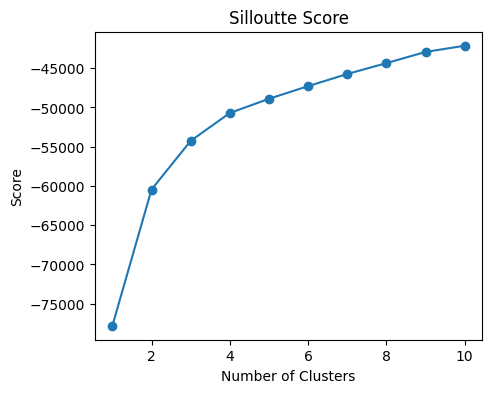

In [ ]:
# Figura de la Silueta
plt.figure(figsize=(5, 4))
plt.plot(Nc,score,marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Silloutte Score')
plt.show()

In [ ]:
# Configura un clusterizador kmeans con inicializacion "k-means++",  3 clusters  y 12 ejecuciones
k = 3
k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12, random_state = 0)

# Ejecuta K-means en la data estandarizada
k_means.fit(clust_std)
print("Inercia: ", k_means.inertia_)
print("Score: ",k_means.score(clust_std))

Inercia:  54263.168131631595
Score:  -54263.1681316316


Aqui se escoge el cluster de K=3 debido a que es en ese punto en el que se da el codo

In [ ]:
# recupera las etiquetas que  asignó k-means  a cada dato
k_means_labels = k_means.labels_

In [ ]:
# obtiene los centros de los clusters que encontro k-means
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-8.03e-03,  2.02e-01, -2.37e-01, -2.00e-01, -2.22e-01, -2.24e-01,
        -2.20e-01, -2.35e-01, -2.16e-01, -2.22e-01, -2.36e-01, -1.73e-01,
        -1.25e-01, -1.31e-01,  9.33e-03, -4.99e-02, -2.82e-02,  0.00e+00,
        -2.48e-01, -8.46e-02, -7.50e-02,  6.38e-04, -4.06e-02, -7.74e-04,
        -8.79e-02, -1.28e-01, -1.61e-01, -1.80e-01, -2.27e-01, -5.50e-02,
        -2.31e-01, -8.40e-02, -3.59e-02, -2.31e-01, -1.08e-01, -1.44e-02,
        -1.72e-01, -8.14e-02, -7.76e-02,  1.13e-02, -3.97e-02, -2.25e-01,
        -2.42e-01, -1.47e-01, -1.56e-01, -5.32e-02, -2.40e-01, -8.53e-02,
        -2.42e-01, -1.60e-01, -1.62e-01, -2.48e-01, -3.23e-02, -1.03e-02,
        -3.41e-02, -3.36e-02, -3.46e-02, -5.66e-03, -4.92e-02, -9.59e-02,
        -4.50e-02, -1.91e-02, -1.22e-02],
       [-4.72e-01, -2.13e+00,  7.24e+00,  4.86e+00,  6.89e+00,  6.05e+00,
         6.96e+00,  6.70e+00,  6.12e+00,  6.96e+00,  7.11e+00,  4.37e+00,
         3.09e+00,  2.01e+00, -1.79e-01,  3.22e+00, -2.82e-02,  0.00e+

In [ ]:
# adiciona una columna 'cluster_std' con las etiquetas de grupos que asignó kmeans a la data estandarizada
clust_std['cluster_std'] = k_means_labels
clust_std.sample(5)

,DOMINIO,ESTRATO,Registro_SUNARP_1,Registro_SUNARP_2,Asistencia_Tecnica_1,Asistencia_Tecnica_2,Asistencia_Tecnica_3,Licencia_1,Licencia_2,Licencia_3,...,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,Contador,MONTO_DEVENGADO,cluster_std
130,0.573095,-1.571706,0.886609,1.252699,0.642971,1.905392,2.868904,1.735037,1.417170,2.726335,...,2.543394,2.644970,2.390182,0.726461,2.870944,3.920631,2.685503,-0.461479,-0.388463,2
321,0.050775,1.233316,-0.293560,-0.478412,-0.311598,-0.422204,-0.330529,-0.347774,-0.403532,-0.349844,...,-0.317936,-0.317724,-0.316534,-0.461433,-0.455958,-0.457916,-0.334485,-0.461479,-0.388463,0
687,0.050775,-0.449698,-0.396184,-0.478412,-0.311598,-0.497288,-0.330529,-0.347774,-0.482692,-0.349844,...,-0.317936,-0.317724,-0.316534,-0.461433,-0.455958,0.636721,-0.334485,-0.461479,-0.388463,0
99,0.050775,0.672311,-0.396184,-0.478412,-0.311598,-0.422204,-0.330529,-0.204132,-0.482692,-0.349844,...,-0.317936,-0.317724,-0.316534,-0.164459,-0.455958,-0.457916,-0.334485,-0.051892,-0.388463,0
842,1.617734,-2.693715,-0.293560,-0.478412,0.086139,-0.684997,-0.330529,0.011331,-0.680595,-0.349844,...,-0.317936,-0.317724,-0.316534,-0.461433,-0.455958,-0.457916,-0.334485,-0.461479,-0.388463,0


In [ ]:
# adiciona una columna 'cluster_std' con las etiquetas de grupos que asignó kmeans a la data original
clust['cluster_std'] = k_means_labels
clust.sample(5)

,DOMINIO,ESTRATO,Registro_SUNARP_1,Registro_SUNARP_2,Asistencia_Tecnica_1,Asistencia_Tecnica_2,Asistencia_Tecnica_3,Licencia_1,Licencia_2,Licencia_3,...,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,Contador,MONTO_DEVENGADO,cluster_std
Key,,,,,,,,,,,,,,,,,,,,,
LORETOMAYNASIQUITOS2021,7,2,99,9,61,76,18,70,66,19,...,0.0,0.0,0.0,7.0,4.0,3.0,1.0,0.0,0.00,2
LIMA PROVINCIALIMALURIN2021,8,1,15,4,9,18,8,7,18,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
APURIMACAYMARAESPOCOHUANCA2021,6,6,0,0,0,8,0,0,8,0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.00,0
HUANCAVELICAHUAYTARAAYAVI2021,5,8,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1514116.16,0
ANCASHSIHUASHUAYLLABAMBA2021,5,6,0,2,0,8,0,0,8,0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.00,0


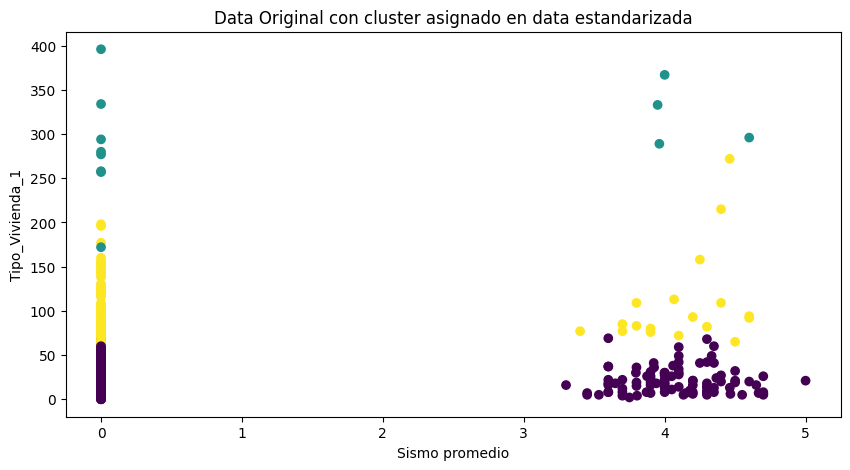

In [ ]:
# muestra un scatter plot 2
plt.figure(figsize=(10,5)) # define tamaño de figura
plt.scatter(clust['Promedio'], clust['Tipo_Vivienda_1'], c=clust['cluster_std'])
plt.xlabel('Sismo promedio')
plt.ylabel('Tipo_Vivienda_1')
plt.title('Data Original con cluster asignado en data estandarizada')
plt.show()  # muestra el plot

In [ ]:
# Extraer el Ubigeo del Clust_backup
clust_bp=clust_backup["UBIGEO"]
clust_bp

Key
AMAZONASBAGUAARAMANGO2021                       10202
AMAZONASBAGUABAGUA2021                          10201
AMAZONASBAGUACOPALLIN2021                       10203
AMAZONASBAGUAIMAZA2021                          10205
AMAZONASBAGUALA PECA2021                        10206
                                                ...  
UCAYALIPADRE ABADALEXANDER VON HUMBOLDT2021    250305
UCAYALIPADRE ABADCURIMANA2021                  250303
UCAYALIPADRE ABADIRAZOLA2021                   250302
UCAYALIPADRE ABADNESHUYA2021                   250304
UCAYALIPADRE ABADPADRE ABAD2021                250301
Name: UBIGEO, Length: 1255, dtype: int64

In [ ]:
resultado = pd.merge(clust, clust_bp, left_index=True, right_index=True)

In [ ]:
df_1PB = pd.merge(resultado, df_ubigeo, how="left", left_on=["UBIGEO"], right_on=["ubigeo_inei"])
df_1PB.head()

,DOMINIO,ESTRATO,Registro_SUNARP_1,Registro_SUNARP_2,Asistencia_Tecnica_1,Asistencia_Tecnica_2,Asistencia_Tecnica_3,Licencia_1,Licencia_2,Licencia_3,...,Contador,MONTO_DEVENGADO,cluster_std,UBIGEO,ubigeo_inei_y,region,provincia,distrito,latitud,longitud
0,7,7,2,3,0,41,1,0,41,1,...,1.0,574686.37,0,10202,10202,AMAZONAS,BAGUA,ARAMANGO,-5.4164,-78.4378
1,7,5,15,3,6,50,7,10,42,11,...,0.0,0.00,0,10201,10201,AMAZONAS,BAGUA,BAGUA,-5.6389,-78.5311
2,7,5,4,2,2,9,1,1,10,1,...,0.0,0.00,0,10203,10203,AMAZONAS,BAGUA,COPALLIN,-5.6750,-78.4231
3,7,7,2,7,0,76,0,0,75,1,...,0.0,0.00,2,10205,10205,AMAZONAS,BAGUA,IMAZA,-5.1636,-78.2889
4,7,6,7,0,0,22,3,1,21,3,...,0.0,0.00,0,10206,10206,AMAZONAS,BAGUA,LA PECA,-5.6119,-78.4369


In [ ]:
df_1PB[df_1PB["cluster_std"]==1]

,DOMINIO,ESTRATO,Registro_SUNARP_1,Registro_SUNARP_2,Asistencia_Tecnica_1,Asistencia_Tecnica_2,Asistencia_Tecnica_3,Licencia_1,Licencia_2,Licencia_3,...,Contador,MONTO_DEVENGADO,cluster_std,UBIGEO,ubigeo_inei_y,region,provincia,distrito,latitud,longitud
400,8,1,137,22,90,154,113,95,152,110,...,0.0,0.000000e+00,1,70101,70101,CALLAO,CALLAO,CALLAO,-12.0631,-77.1469
404,8,1,168,19,44,233,36,48,227,38,...,0.0,0.000000e+00,1,70106,70106,CALLAO,CALLAO,VENTANILLA,-11.8772,-77.1278
621,2,2,137,19,164,106,18,165,105,18,...,1.0,4.625860e+06,1,110101,110101,ICA,ICA,ICA,-14.0636,-75.7292
783,1,1,116,15,108,65,64,131,49,57,...,9.0,2.420107e+06,1,130101,130101,LA LIBERTAD,TRUJILLO,TRUJILLO,-8.1000,-79.0306
788,1,1,175,16,156,124,60,165,114,61,...,14.0,1.768350e+06,1,140101,140101,LAMBAYEQUE,CHICLAYO,CHICLAYO,-6.7669,-79.8506
852,8,1,94,21,47,205,38,51,199,40,...,0.0,0.000000e+00,1,150132,150132,LIMA PROVINCIA,LIMA,SAN JUAN DE LURIGANCHO,-12.0297,-77.0100
988,7,4,96,26,30,239,66,52,219,64,...,0.0,0.000000e+00,1,170101,170101,MADRE DE DIOS,TAMBOPATA,TAMBOPATA,-12.5936,-69.1767
999,3,3,193,7,111,141,52,118,137,49,...,0.0,0.000000e+00,1,180301,180301,MOQUEGUA,ILO,ILO,-17.6250,-71.3433
1003,3,3,177,15,116,183,44,127,169,47,...,0.0,0.000000e+00,1,180101,180101,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,-17.1942,-70.9333
1216,3,2,193,28,73,280,46,71,280,48,...,0.0,0.000000e+00,1,230110,230110,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIP,-18.0431,-70.2517


In [ ]:
df_1PB["cluster_std"].value_counts()

0    1137
2     106
1      12
Name: cluster_std, dtype: int64

In [ ]:
grupoCluster = df_1PB.groupby("cluster_std").mean()
grupoCluster.T.head(20)

cluster_std,0,1,2
DOMINIO,4.887423,4.000000,5.169811
ESTRATO,6.160950,2.000000,2.377358
Registro_SUNARP_1,3.107300,148.750000,41.245283
Registro_SUNARP_2,0.966579,18.500000,7.169811
Asistencia_Tecnica_1,1.123131,90.500000,24.084906
Asistencia_Tecnica_2,13.290237,180.333333,64.896226
Asistencia_Tecnica_3,0.797713,52.416667,13.641509
Licencia_1,1.568162,98.083333,29.405660
Licencia_2,12.729112,172.916667,59.311321
Licencia_3,0.913808,52.250000,13.905660


Aqui se puede observar que lo que ha hecho el cluster es agrupar a las filas que tengan mayores números en todas sus variables en el Cluser 1, en segundo lugar al Cluster 2 y por último al Cluster 0. Sin embargo, esto no brinda un adecuado agrupamiento e interpretación.

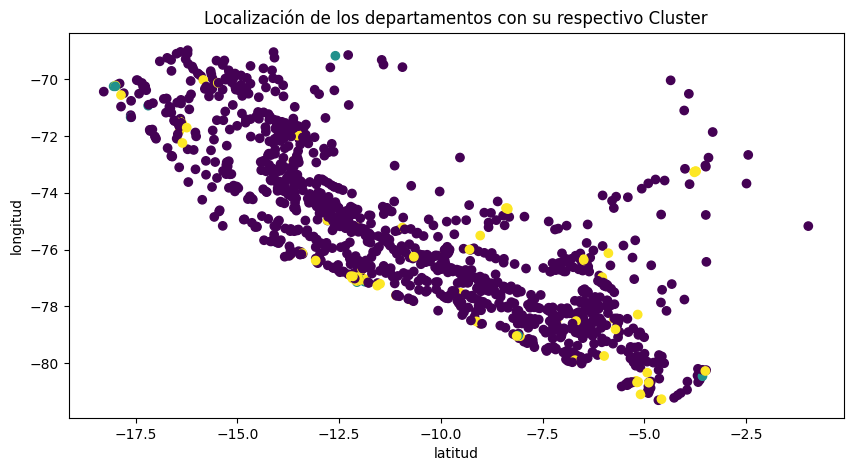

In [ ]:
# muestra un scatter plot 2D de Age (estandarizado) vs Income (estandarizado)
plt.figure(figsize=(10,5)) # define tamaño de figura
plt.scatter(df_1PB['latitud'], df_1PB['longitud'], c=df_1PB['cluster_std'])
plt.xlabel('latitud')
plt.ylabel('longitud')
plt.title('Localización de los departamentos con su respectivo Cluster')
plt.show()  # muestra el plot

CONCLUSIÓN: La Clusterización no refleja un adecuado agrupamiento de los datos. Sin embargo, uno de las hipótesis extraídas respecto a este resultado es que se ha trabajado en su mayoria con variables binarias, las cuales no permiten al kmeans generar un mejor modelo. Esto porque el kmeans es un algoritmo basado en distancias, asi que si se tiene variables con rango más pequeños que otros, a pesar de la estandarización, no ayuda lo sufiente. Para una continuación del proyecto, se intentará codificar las variables categóricas con respecto al impacto que tendría en el Nivel de prevención ante sismos del Distrito, sería un análisis más exhaustivo de cada una de las variables, pero que recompensarían enormemente a un mejor resultado e interpretación.
